<a href="https://colab.research.google.com/github/veronica1908/RH_Entrega1/blob/main/2_carga_lib_paq_limpieza_a_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carga de paquetes y librerías**

In [1]:
### Carga de paquetes y librerías
!pip install tensorflow
!pip install keras
!pip install scikit-learn
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 67.3 MB/s eta 0:00:00


In [27]:
# importamos librerias
import sqlite3
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import tempfile
import sweetviz as sv
import plotly.express as px
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones

## **Carga o conexión de datos**

In [3]:
# Cargar el contenido del archivo CSV-SQL en un DataFrame de Pandas
dfdata = pd.read_csv("https://github.com/veronica1908/RH_Entrega1/raw/c510a11999febb3074b9eb5f7b1dc19a36435978/dftotal_Preprocesado.csv")

# Visualizar las primeras filas del DataFrame
dfdata.head()


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2015-12-31,2,4,2015-12-31,Yes,2016-10-15,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2.0,1.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2015-12-31,2,3,2015-12-31,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,1.0,3.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN


##**Limpieza y transformación de los datos**


In [4]:
# Revisión inicial de datos para obsevar las dimensiones del dataframe
dfdata.shape

(8820, 35)

In [5]:
# Lista de las etiquetas de las columnas presentes en el dataFrame.
dfdata.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'InfoDate',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'DateSurvey', 'JobInvolvement', 'PerformanceRating', 'SurveyDate',
       'Attrition', 'retirementDate', 'retirementType', 'resignationReason'],
      dtype='object')

In [6]:
# Información sobre las columnas y su tipo de datos
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   Department               8820 non-null   object 
 3   DistanceFromHome         8820 non-null   int64  
 4   Education                8820 non-null   int64  
 5   EducationField           8820 non-null   object 
 6   EmployeeCount            8820 non-null   int64  
 7   EmployeeID               8820 non-null   int64  
 8   Gender                   8820 non-null   object 
 9   JobLevel                 8820 non-null   int64  
 10  JobRole                  8820 non-null   object 
 11  MaritalStatus            8820 non-null   object 
 12  MonthlyIncome            8820 non-null   int64  
 13  NumCompaniesWorked       8782 non-null   float64
 14  Over18                  

In [7]:
# Identificar rápidamente las columnas que tienen datos faltantes en el conjunto de datos.
dfdata.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           38
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears            18
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
InfoDate                      0
EnvironmentSatisfaction      50
JobSatisfaction              40
WorkLifeBalance              76
DateSurvey                    0
JobInvolvement                0
PerformanceRating             0
SurveyDate                    0
Attritio

In [8]:
# Imprimir los valores únicos de cada columna para identificar categorías
for columna in dfdata.columns[:]:
  print('\n {}'.format(columna))
  print(dfdata[columna].unique())


 Age
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

 Education
[2 1 4 5 3]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EmployeeCount
[1]

 EmployeeID
[   1    2    3 ... 4408 4409 4410]

 Gender
['Female' 'Male']

 JobLevel
[1 4 3 2 5]

 JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

 MaritalStatus
['Married' 'Single' 'Divorced']

 MonthlyIncome
[131160  41890 193280 ...  37020  23980  54680]

 NumCompaniesWorked
[ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8

In [10]:
# Eliminar los datos nulos de la columnas identificadas con datos nulos en bajo porcentaje.
dfdata = dfdata.dropna(subset=['NumCompaniesWorked','TotalWorkingYears','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [11]:
# Reemplazar los valores nulos en las columnas Attrition,  retirementDate , retirementType, resignationReason, por la cadena "NA" (no aplica), ya que son columnas que solo aplican cuando hay retiros.
columnas_a_reemplazar = ['Attrition', 'retirementDate', 'retirementType', 'resignationReason']

# Reemplazar los valores nulos en las columnas especificadas por la cadena "NA"
dfdata[columnas_a_reemplazar] = dfdata[columnas_a_reemplazar].fillna('NA')

<ipython-input-11-6fa9959d1abd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata[columnas_a_reemplazar] = dfdata[columnas_a_reemplazar].fillna('NA')


In [12]:
# Verificar las columnas nuevamente en cuanto a datos nulos, confirmando que no quedan pendientes.
dfdata.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
InfoDate                   0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
DateSurvey                 0
JobInvolvement             0
PerformanceRating          0
SurveyDate                 0
Attrition                  0
retirementDate             0
retirementType             0
resignationRea

In [13]:
#Verificamos nuevamente la dimensión de la base de datos
dfdata.shape

(8600, 35)

Como ya se han tratado los datos nulos, procedemos a realizar el análisis exploratorio para comprender mejor las variables.

## **Análisis exploratorio de los datos**

<ipython-input-30-c1c7c4005a85>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 1000x800 with 0 Axes>

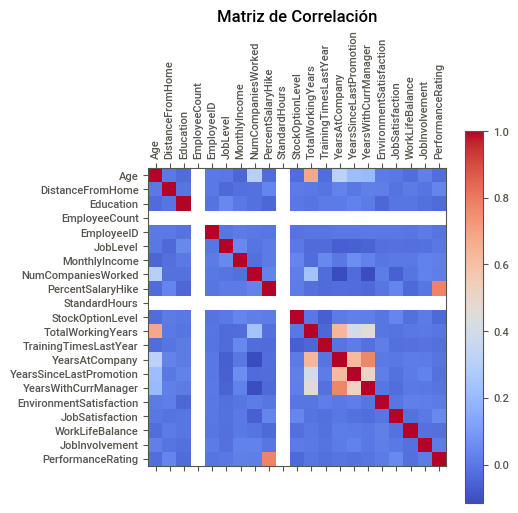

In [30]:
# Calcular la matriz de correlación
correlation_matrix = dfdata.corr()

# Crear un gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Matriz de Correlación')
plt.show()

In [26]:
###Analizar correlación de numéricas con un rango amplio,las de rangopequeño se pueden analizar como categóricas
dfdata.info()
continuas = ['perf_2023',
             'dias_lst_mov',
             'antiguedad_dias',
             'edad_dias',
             'PayRate2',
             'EmpSatisfaction',
             'EngagementSurvey'
             ]
scatter_matrix(dfdata[continuas], figsize=(12, 8))
plt.show()
cont=dfdata[continuas]
corr_matrix = cont.corr()
corr_matrix["perf_2023"].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8600 entries, 0 to 8818
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8600 non-null   int64  
 1   BusinessTravel           8600 non-null   object 
 2   Department               8600 non-null   object 
 3   DistanceFromHome         8600 non-null   int64  
 4   Education                8600 non-null   int64  
 5   EducationField           8600 non-null   object 
 6   EmployeeCount            8600 non-null   int64  
 7   EmployeeID               8600 non-null   int64  
 8   Gender                   8600 non-null   object 
 9   JobLevel                 8600 non-null   int64  
 10  JobRole                  8600 non-null   object 
 11  MaritalStatus            8600 non-null   object 
 12  MonthlyIncome            8600 non-null   int64  
 13  NumCompaniesWorked       8600 non-null   float64
 14  Over18                  

KeyError: "None of [Index(['perf_2023', 'dias_lst_mov', 'antiguedad_dias', 'edad_dias', 'PayRate2',\n       'EmpSatisfaction', 'EngagementSurvey'],\n      dtype='object')] are in the [columns]"

                                             |          | [  0%]   00:00 -> (? left)


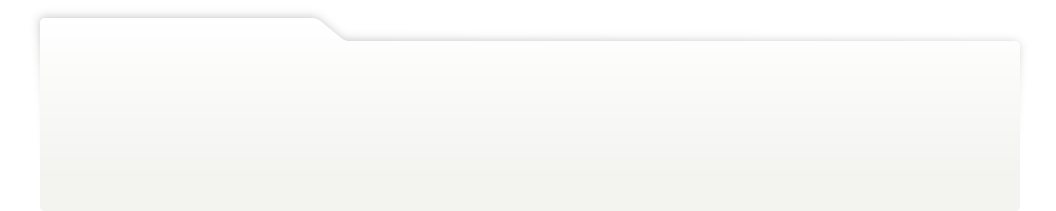
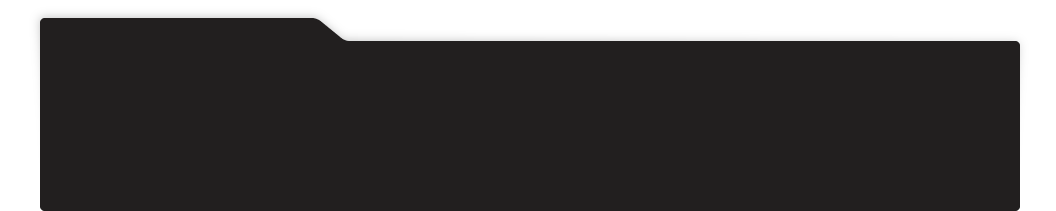
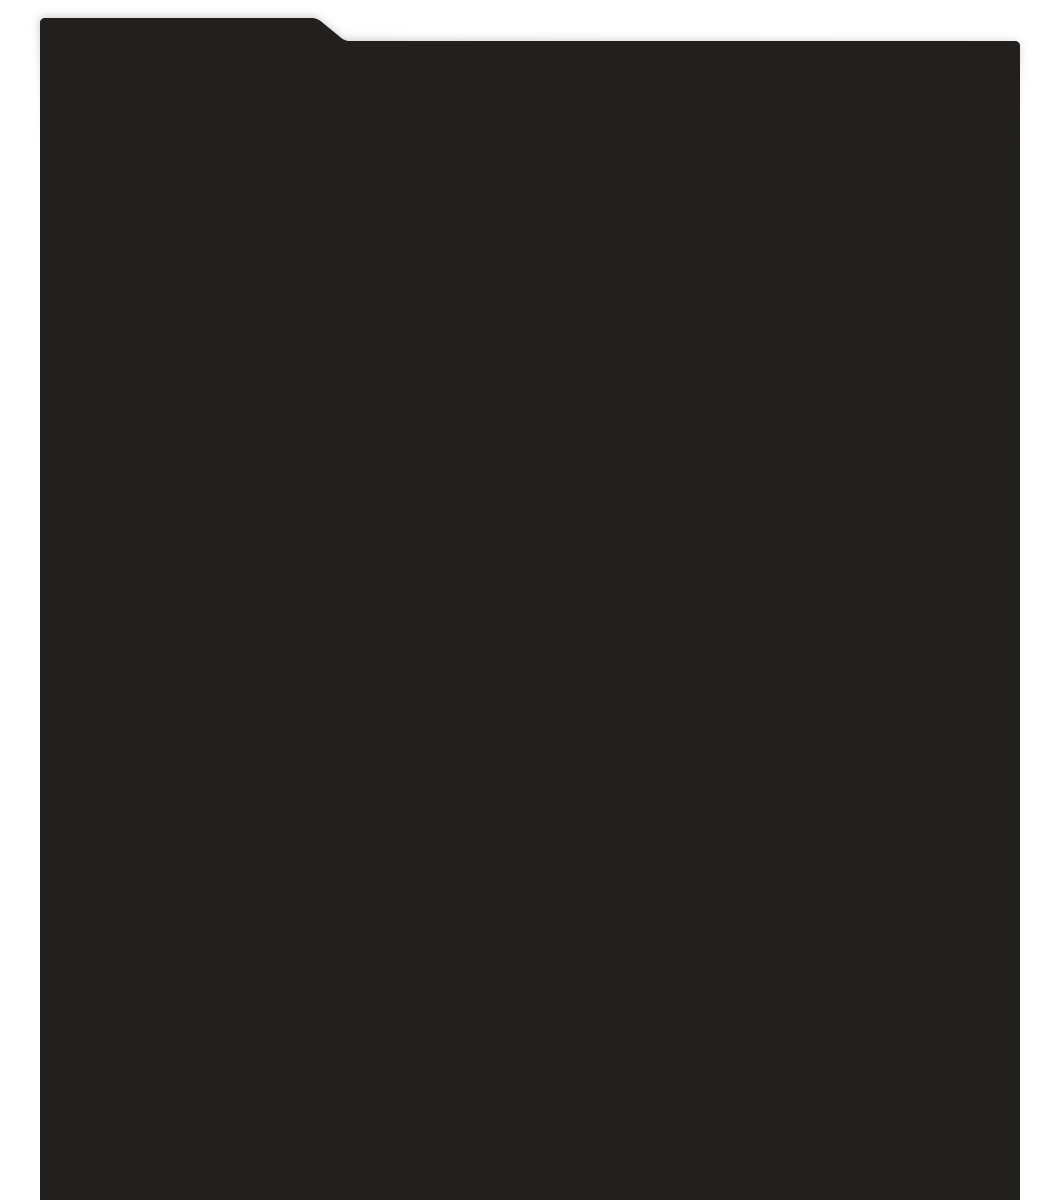
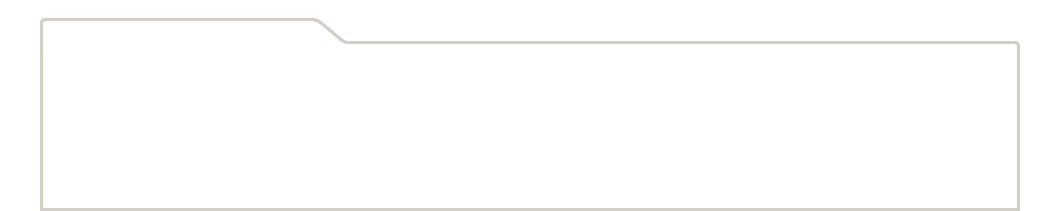
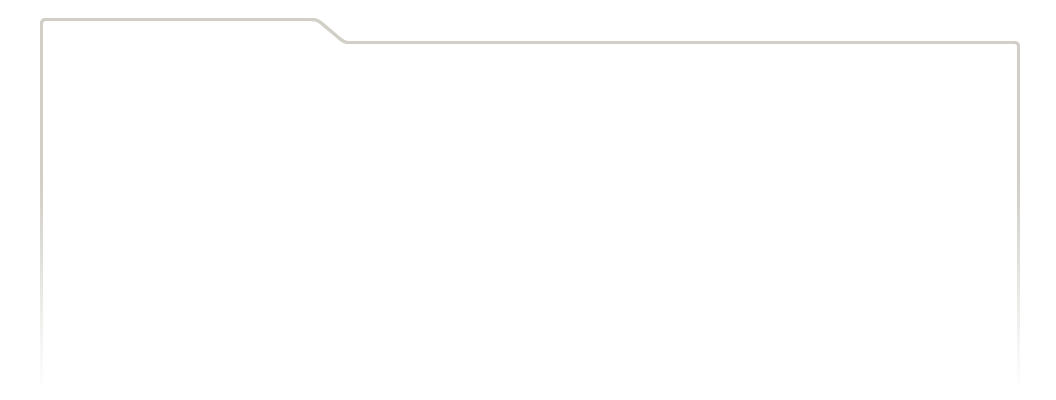
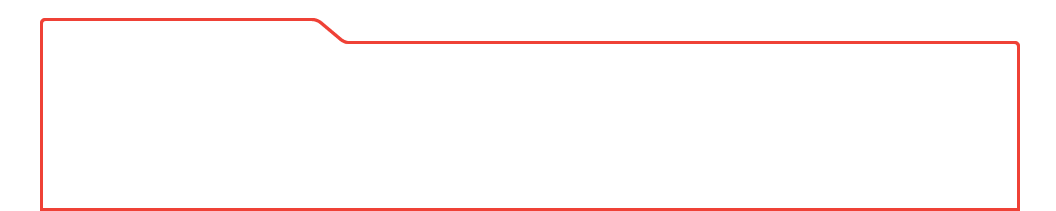
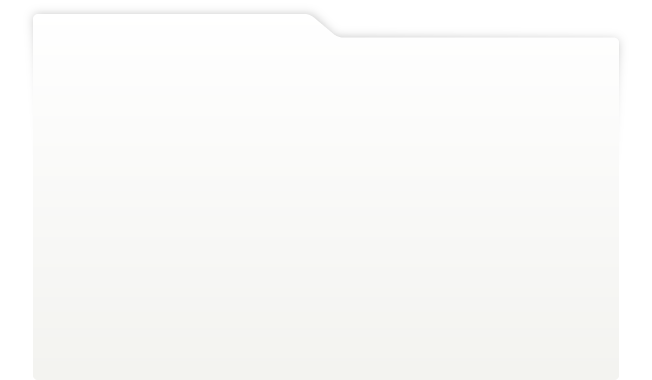
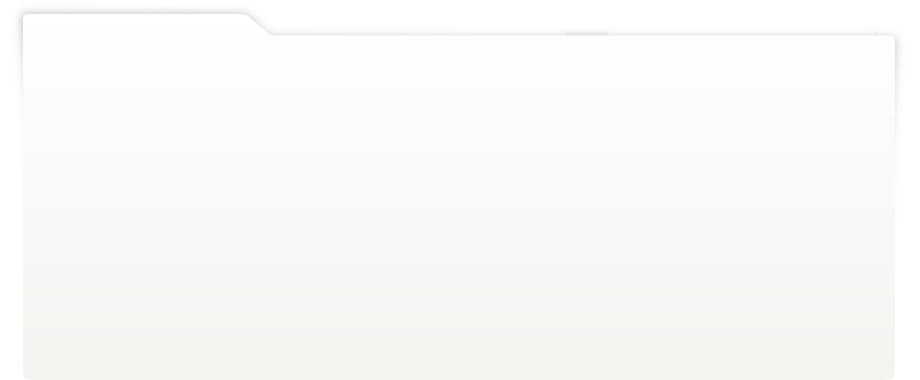
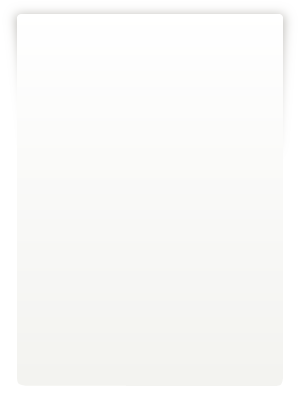
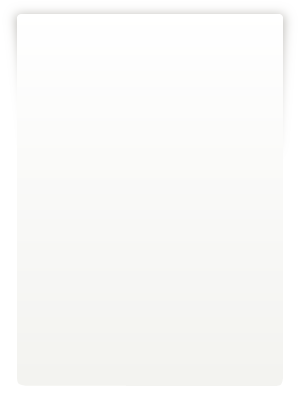
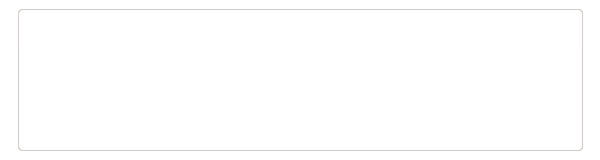
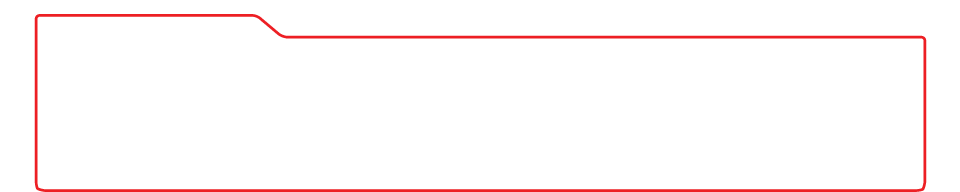
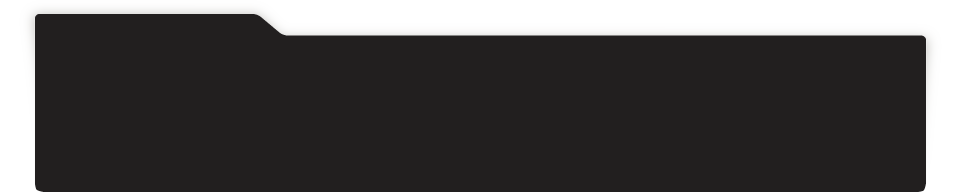
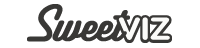
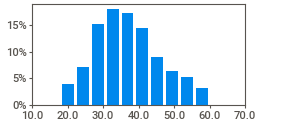
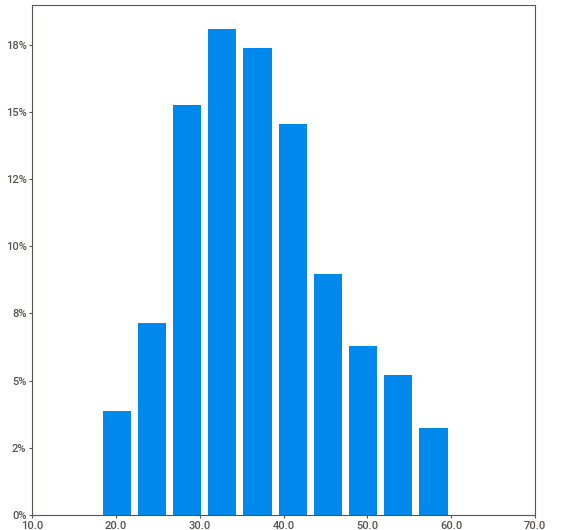
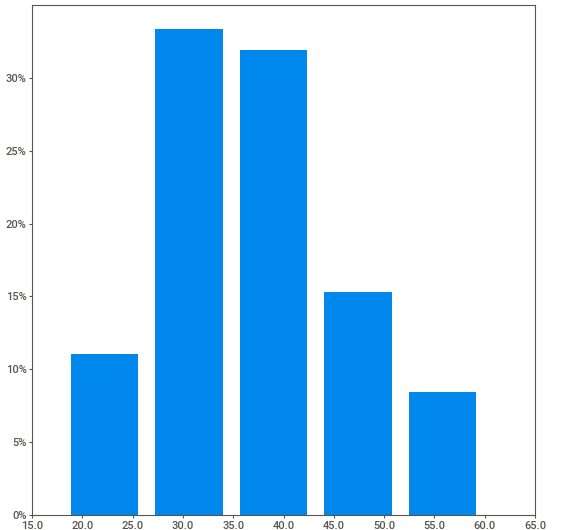
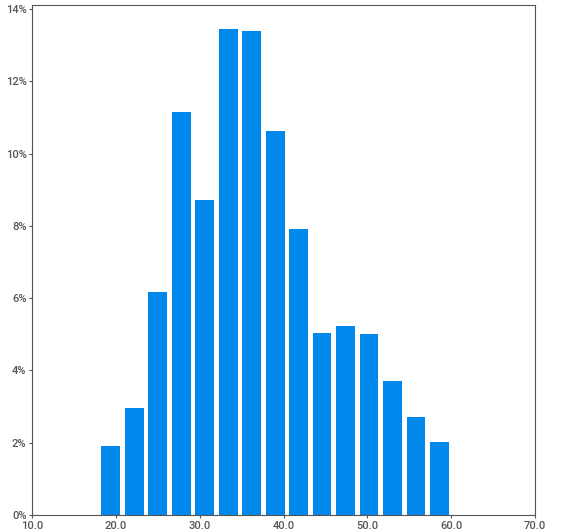
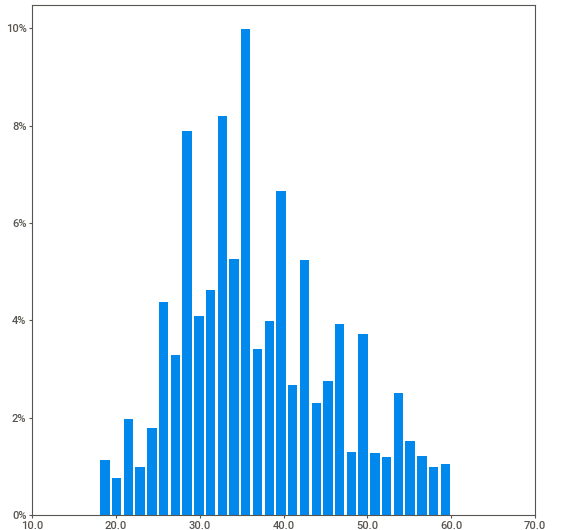
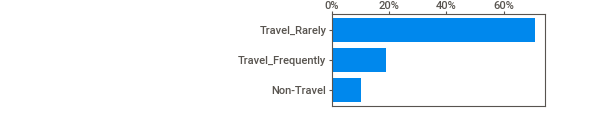
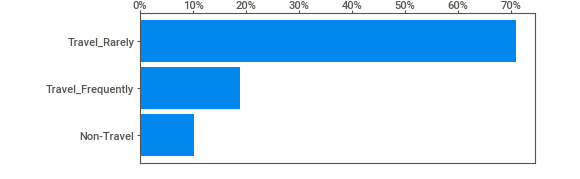
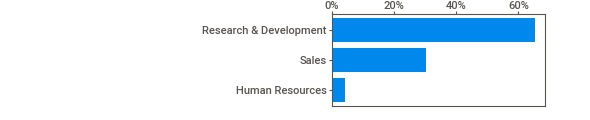
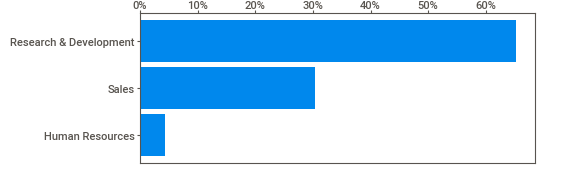
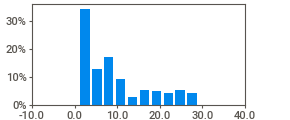
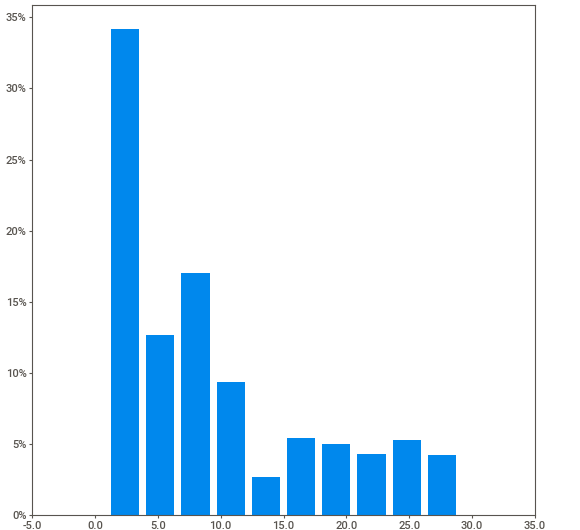
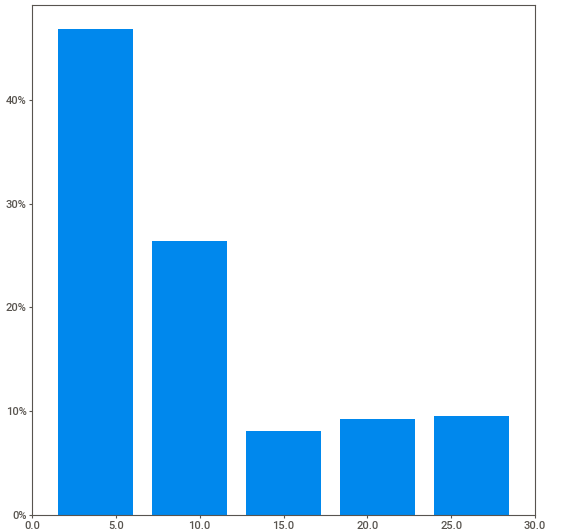
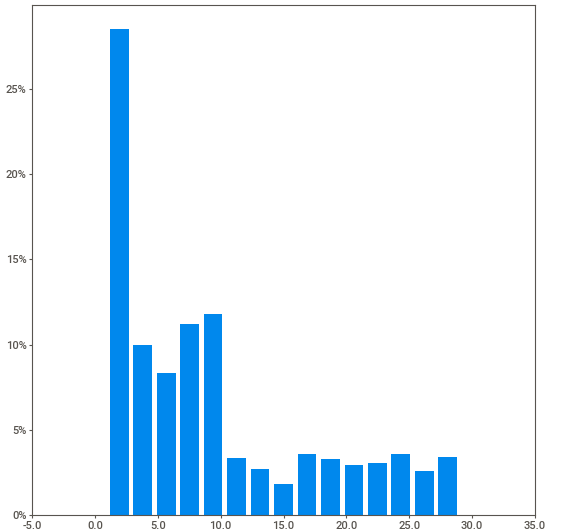
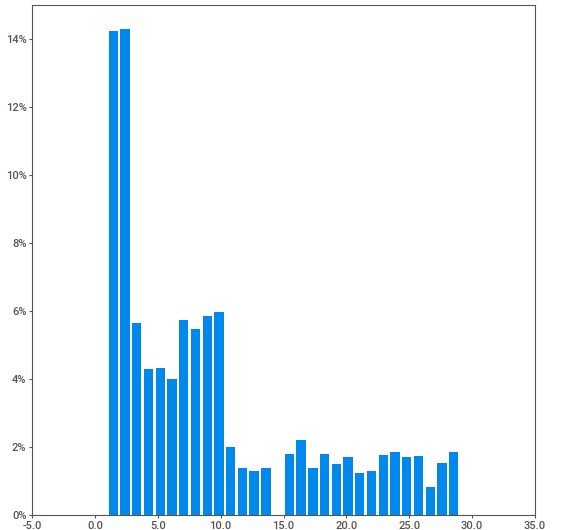
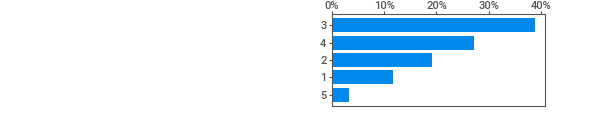
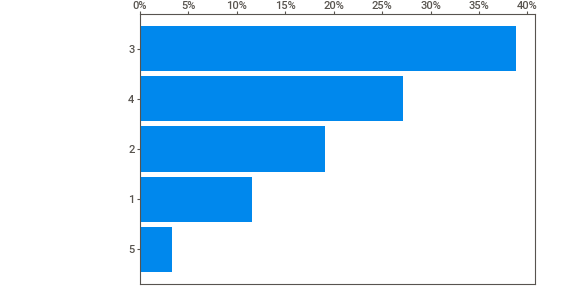
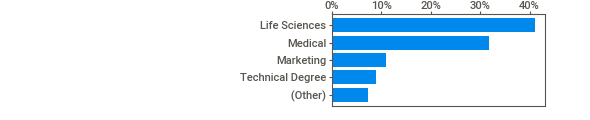
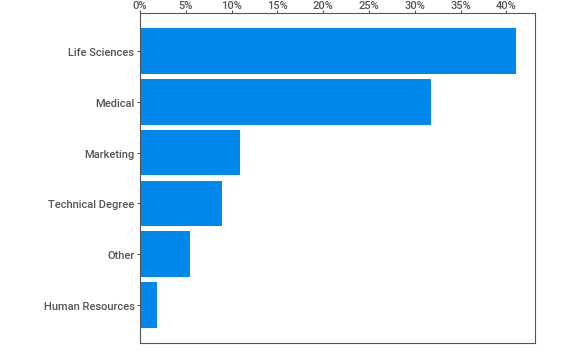
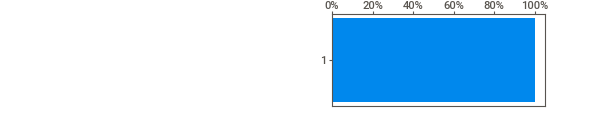
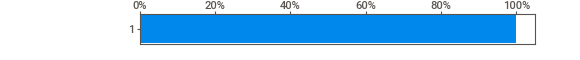
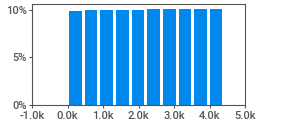
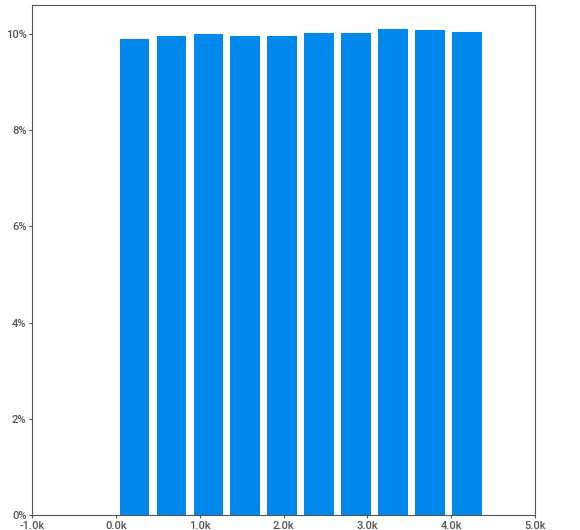
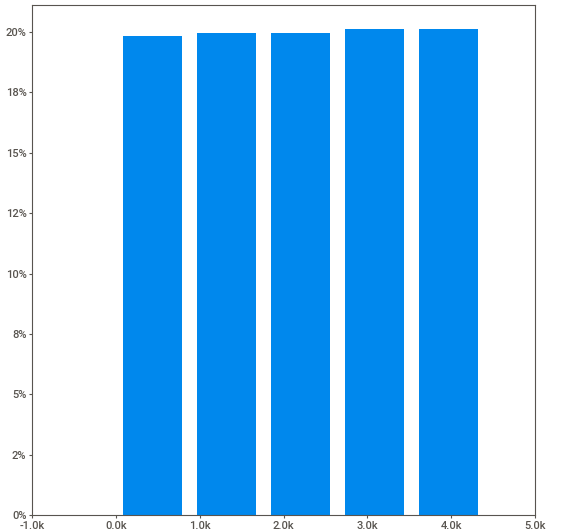
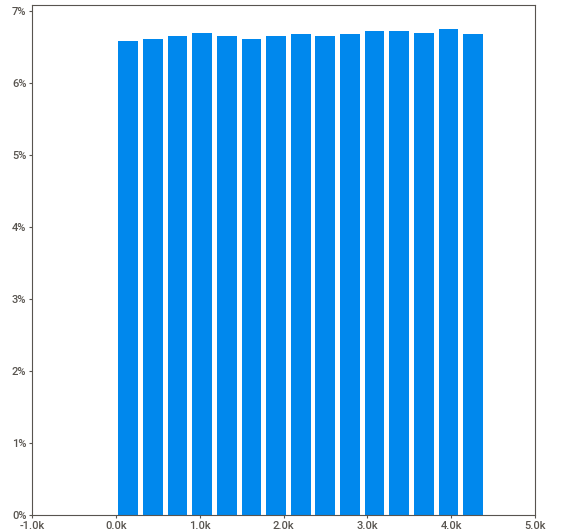
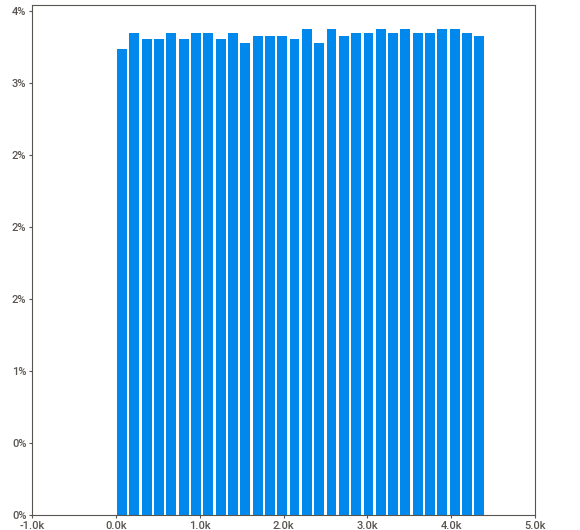
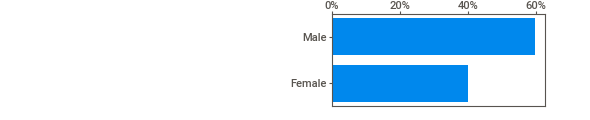
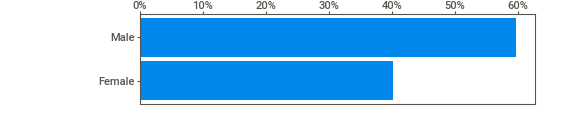
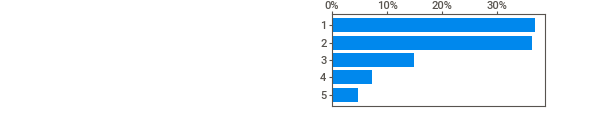
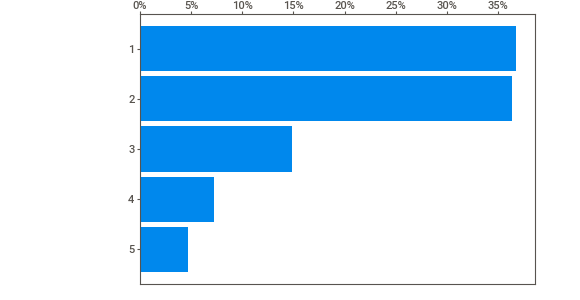
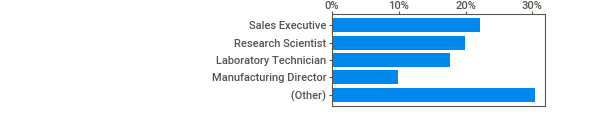
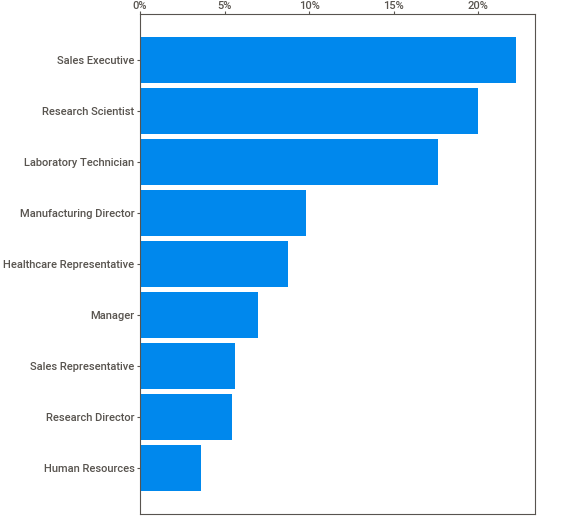
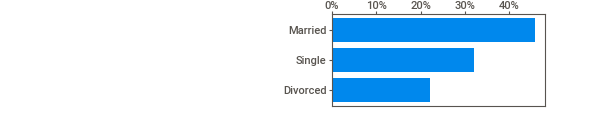
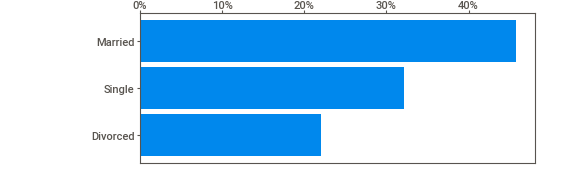
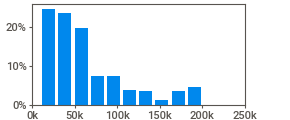
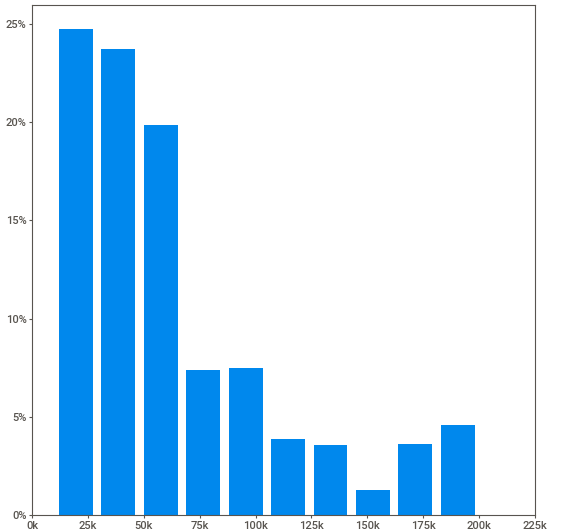
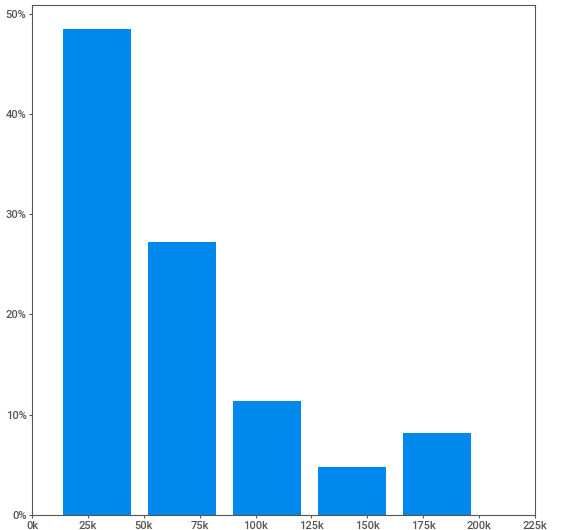
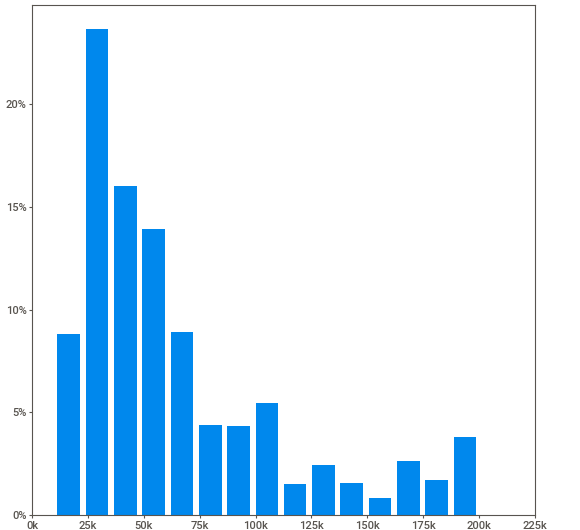
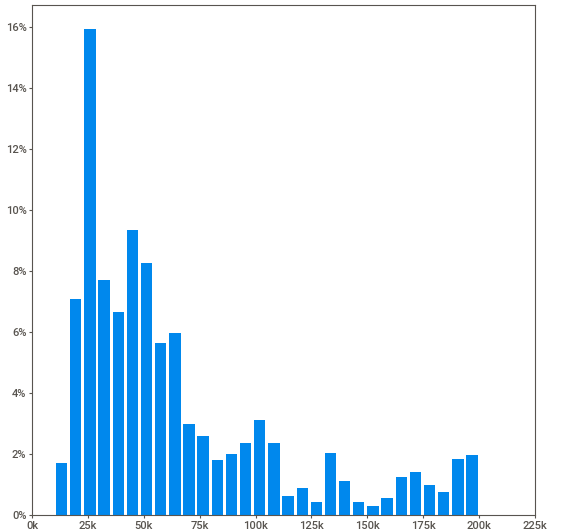
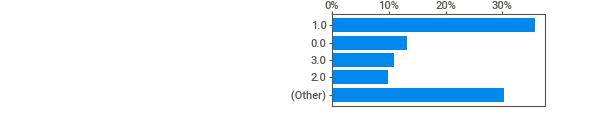
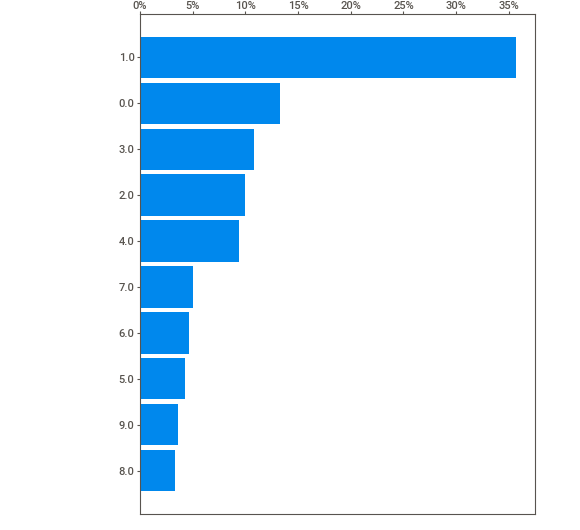
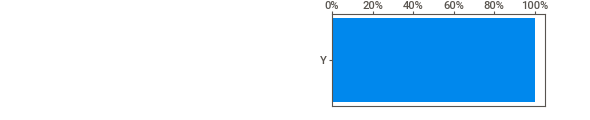
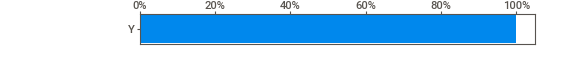
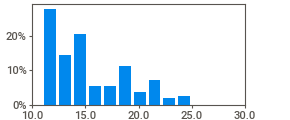
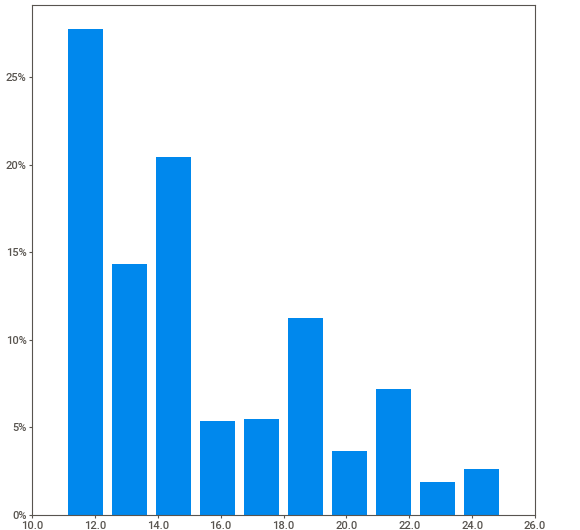
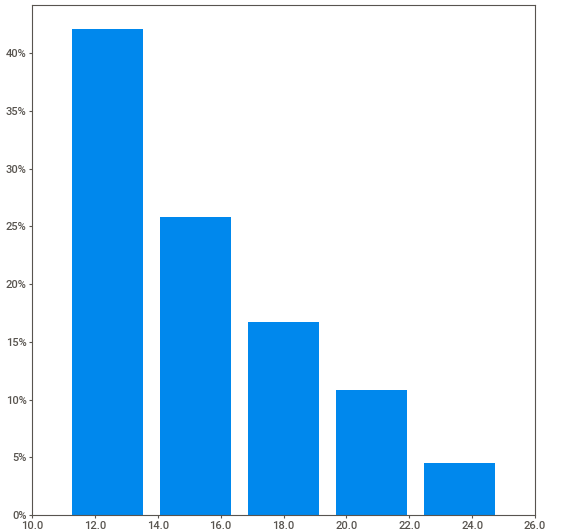
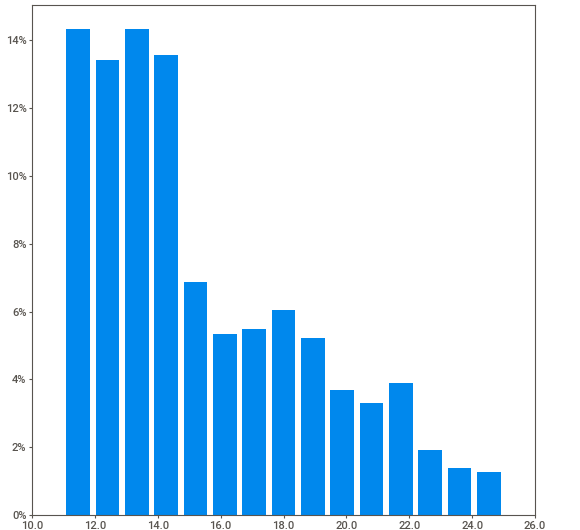
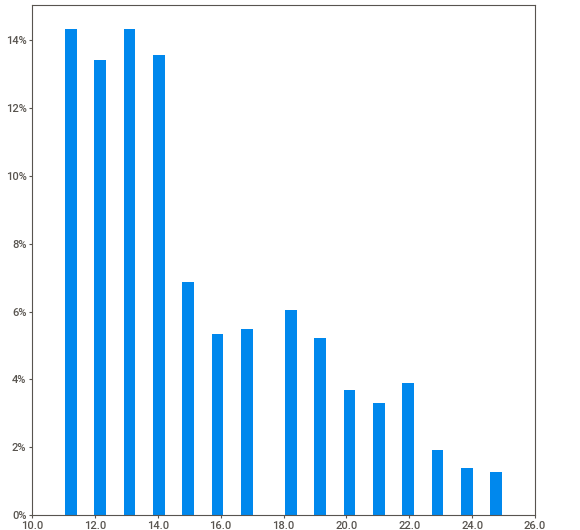
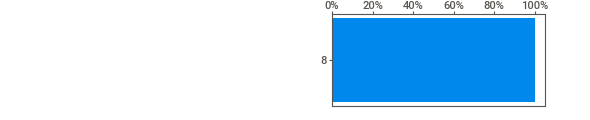
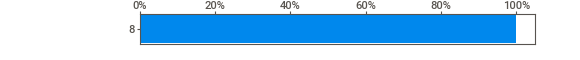
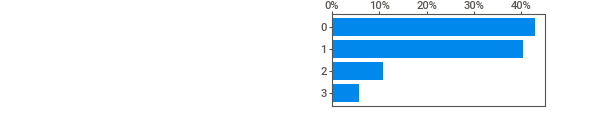
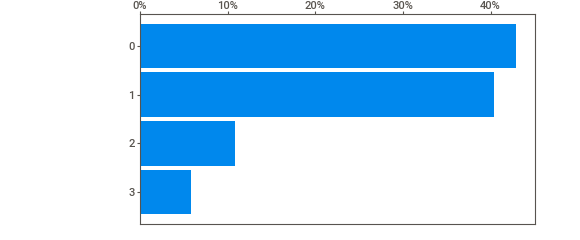
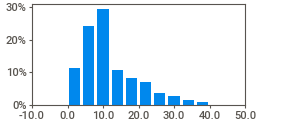
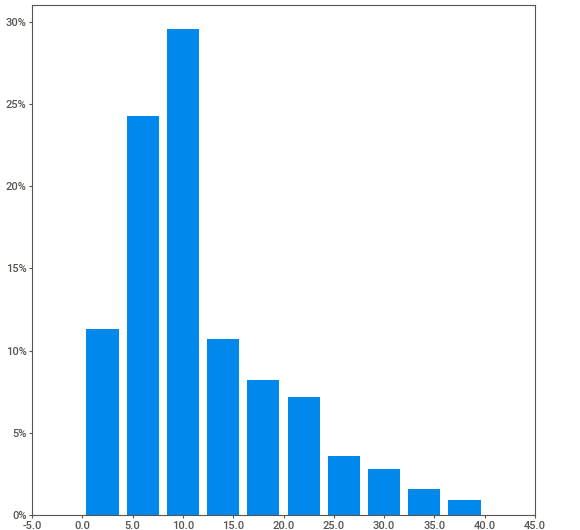
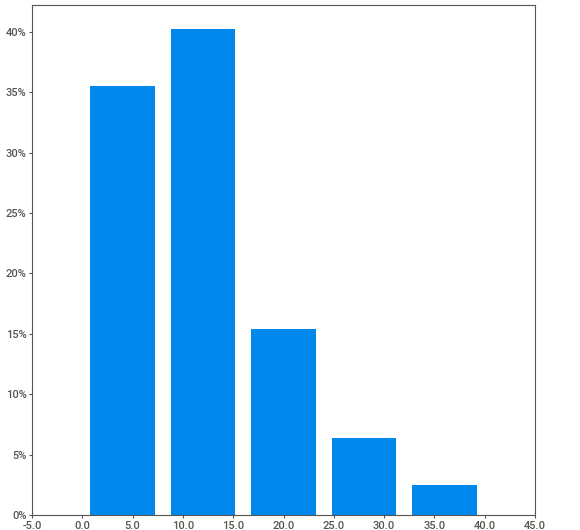
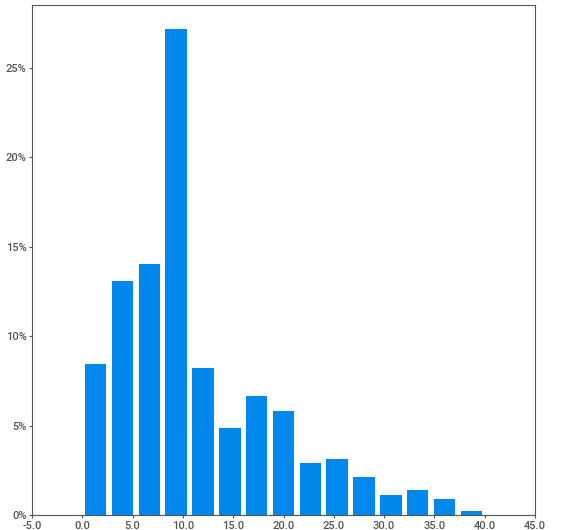
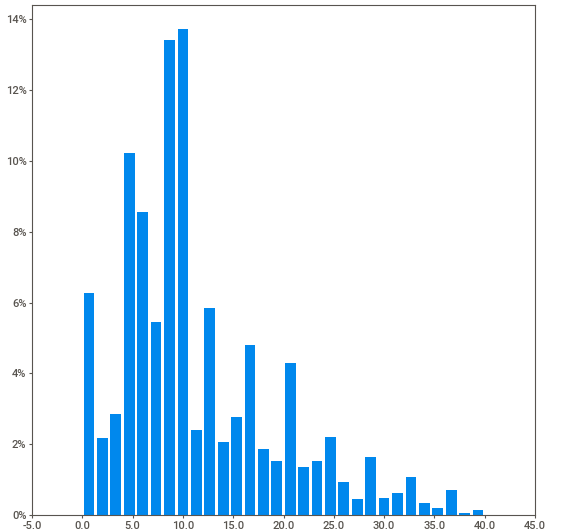
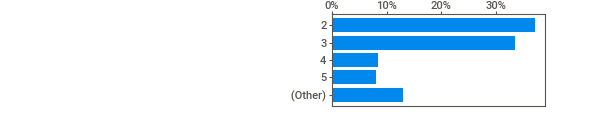
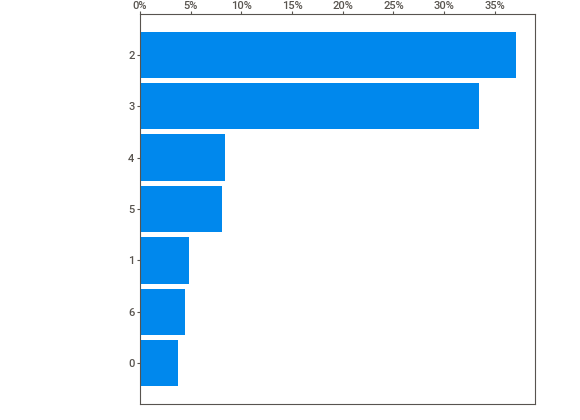
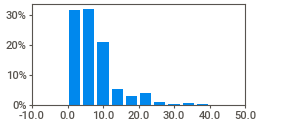
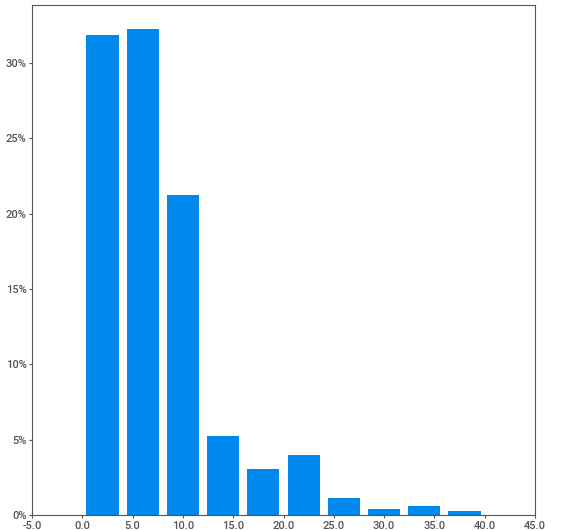
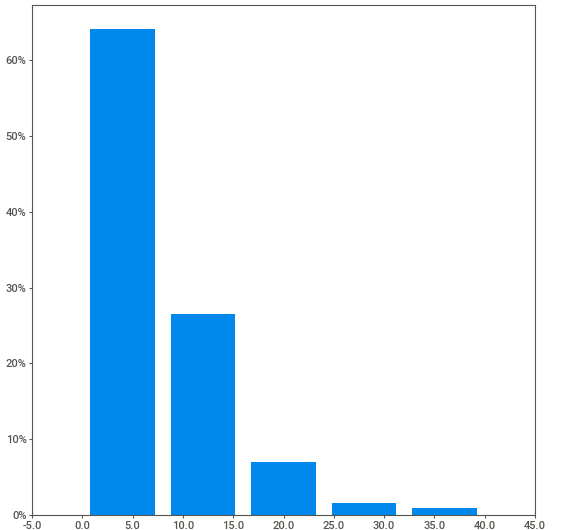
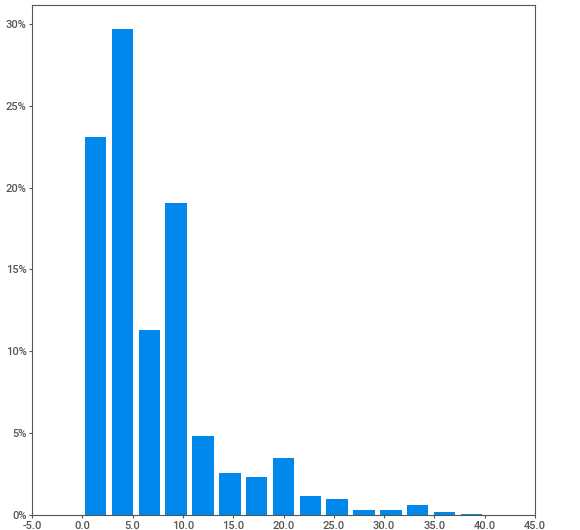
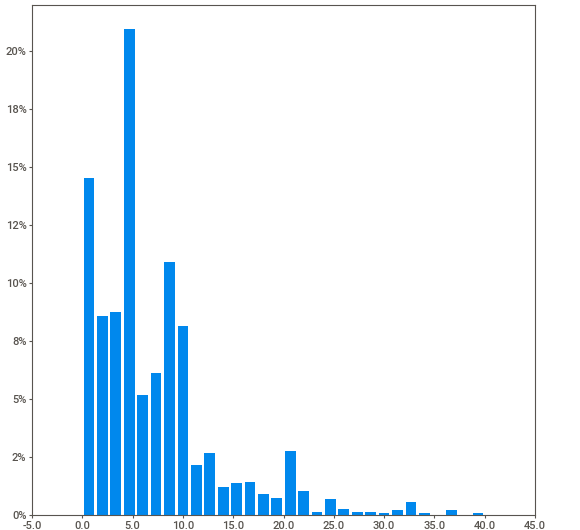
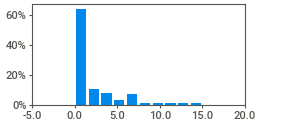
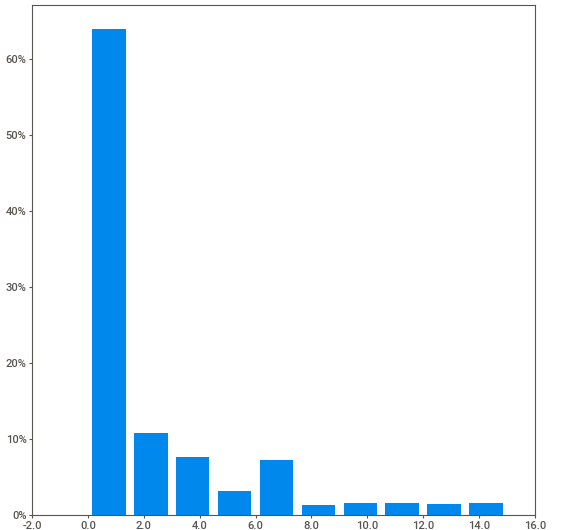
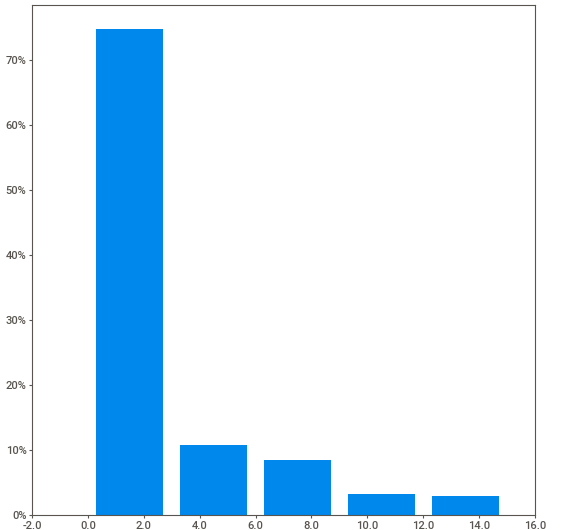
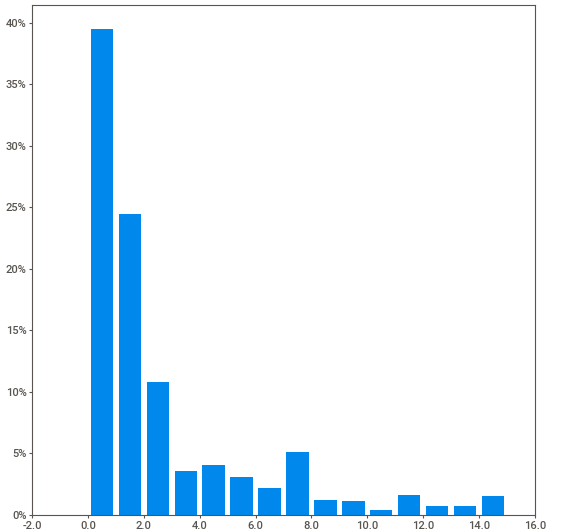
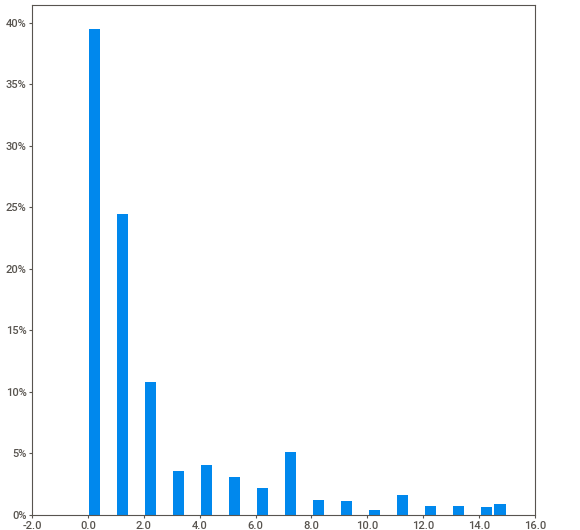
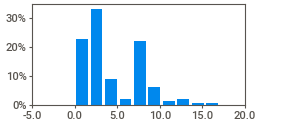
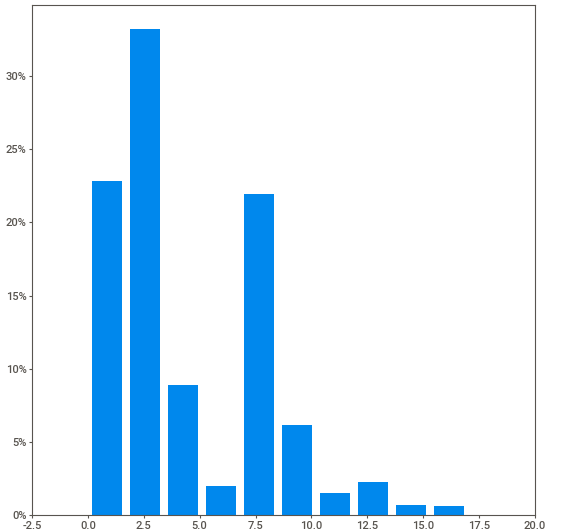
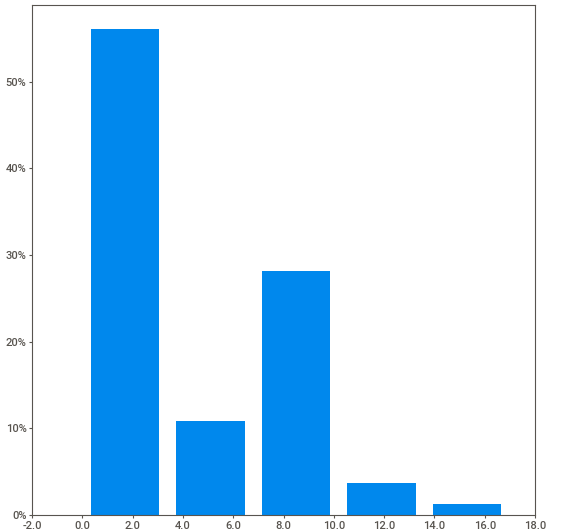
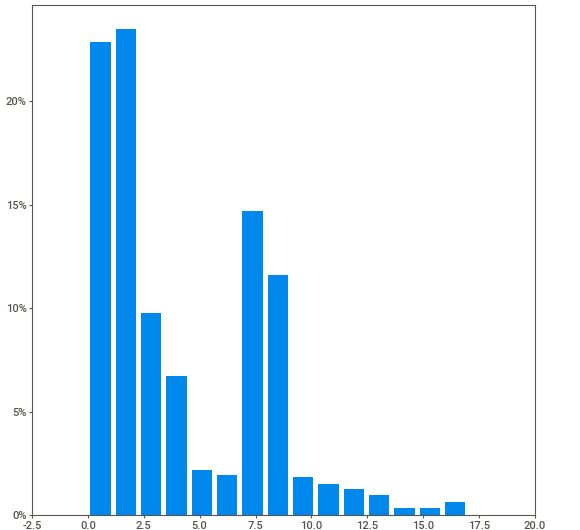
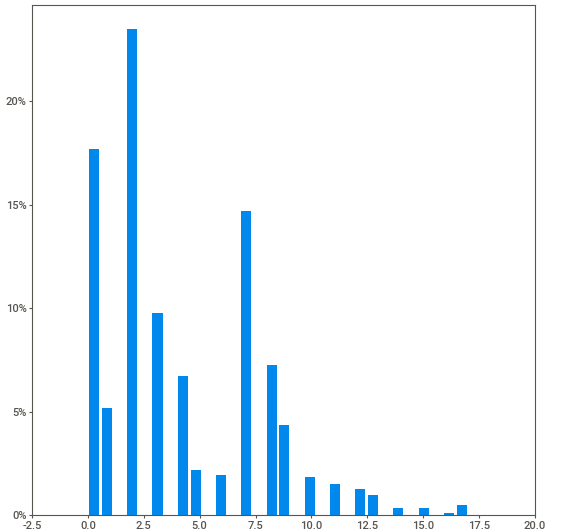
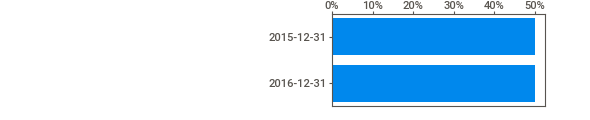
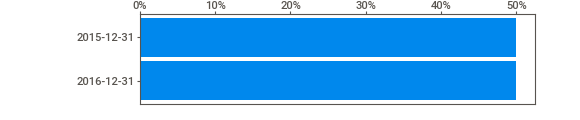
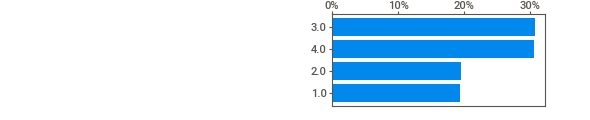
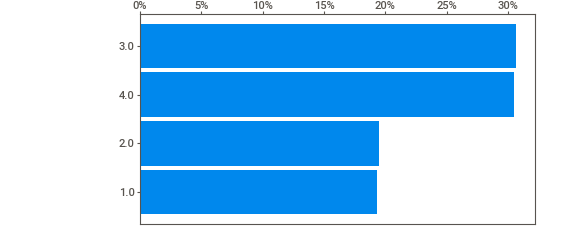
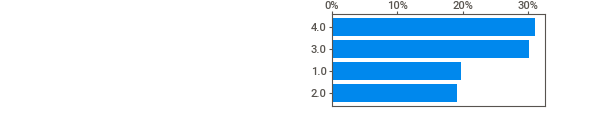
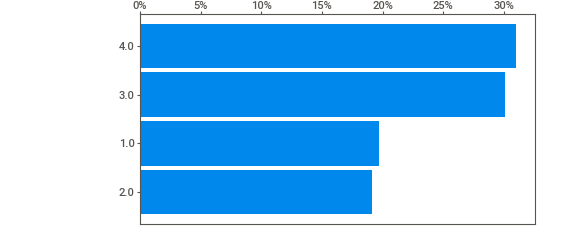
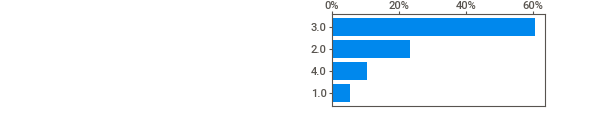
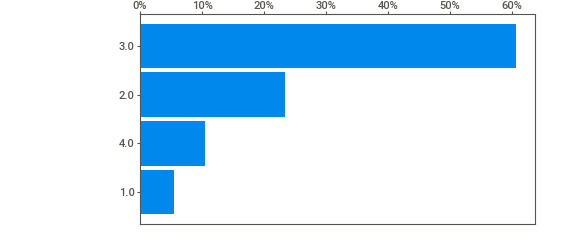
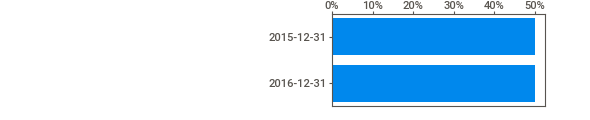
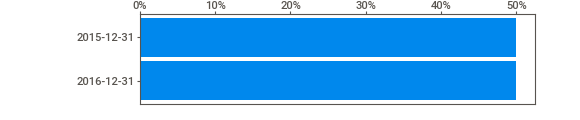
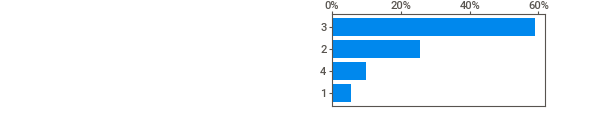
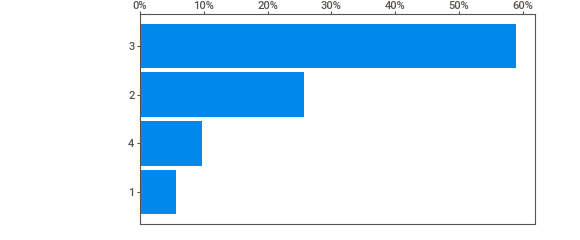
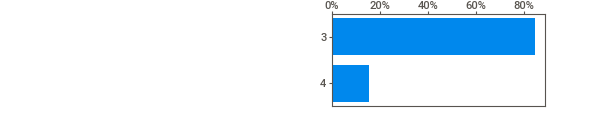
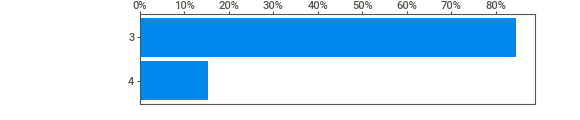
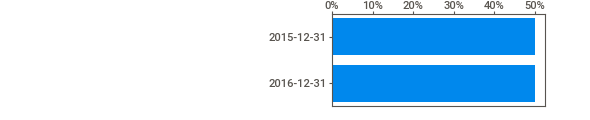
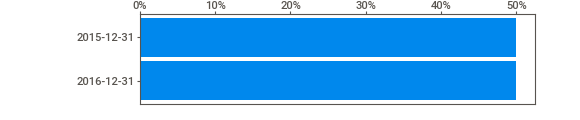
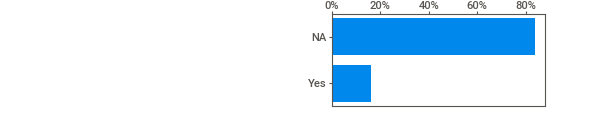
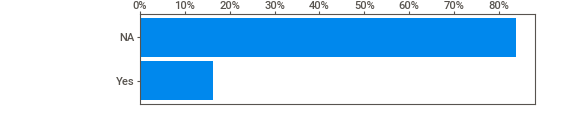
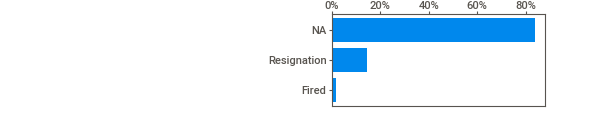
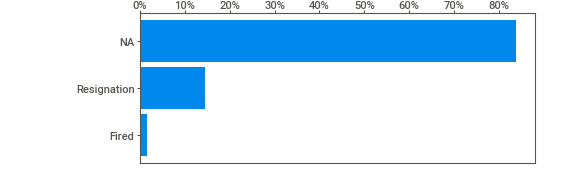
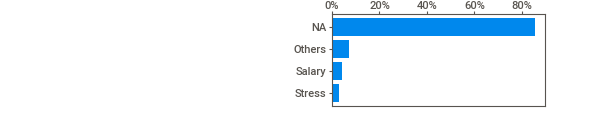
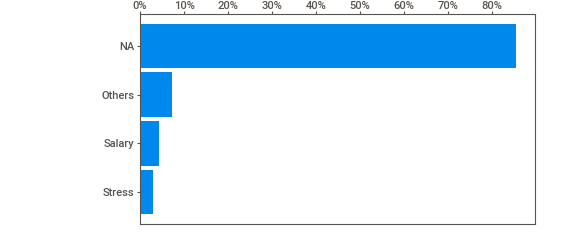
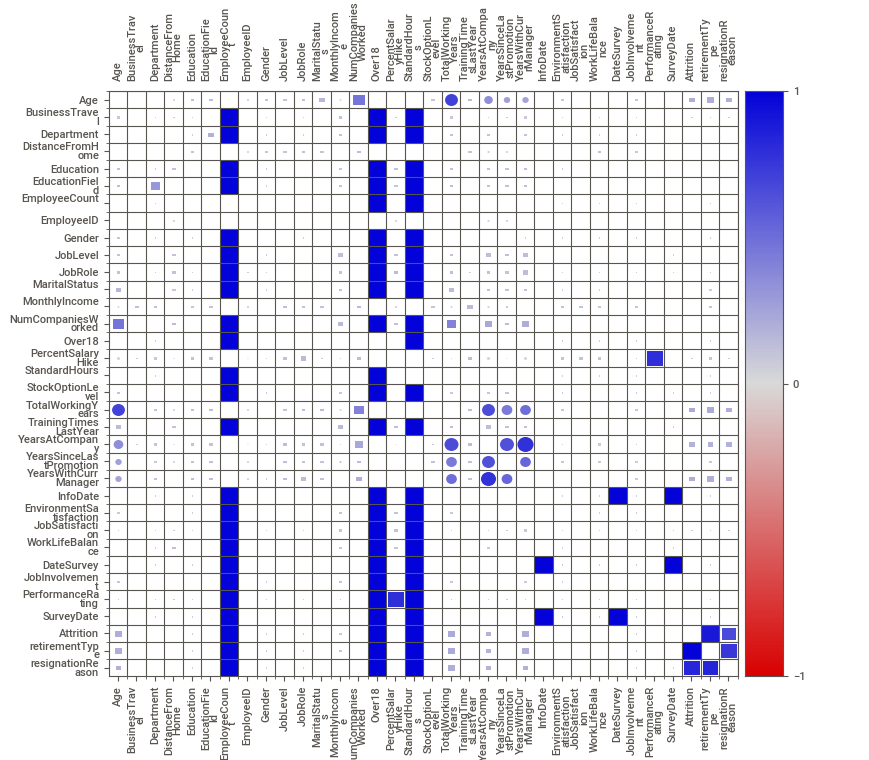
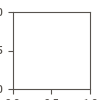

In [14]:
#Exploración rápida de las variables
rgd = sv.analyze(dfdata)
rgd.show_notebook()

En esta exploración rápida de los datos, puede observarse lo siguiente:
- La variable de edad tiene una distribución parecida a la normal, concentrándose entre los 30 y los 40 años.
- La gran mayoría raramente viaja.
- El departamento de investigación y desarrollo tiene más del 60% de los empleados, seguido por Ventas con un 30% de ellos y el restante se encuentra en el departamento de recursos humanos.
- En cuanto a distancia de la casa, puede verse que la mayoría viven a distancias inferiores a 20.
- Más del 80% de los empleados poseen un nivel de educación igual o superior al 2.
- Su campo de educación se concentra en ciencias de la vida y medicina.
- Prevalece el género másculino con el 60%.
- El nivel de trabajo se ubica en casi igual proporción para puntuaciones 1 y 2.
- Más del 30% de los empleados están en diversos puestos de trabajo, alrededor del 20% son ejecutivos de ventas, casi otro 20% son investigadores científicos y el restante son técnicos de laboratorio.
- En cuanto a su estado civil, alrededor del 45% de los empleados están casados, 30% solteros y el restante están divorciados.
- El ingreso mensual muestra que la gran mayoría cuenta con salarios alrededor de 50K, luego unos pocos, cuentam con salarios superiores a 100K.
- La mayoría solo ha trabajado en una compañía, esto es alrededor del 35% de los empleados, mientras que casi el 15% no ha trabajado anteriormente en otras emrpesas.
- Se confirma que el 100% de los empleados son mayores de 18 años.
- El porcentaje de aumento del salario se concentra en un valor menor al 15% para mayoría d elos empleados.
- Se confirma que todos laboran ocho horas diarias.
- El nivel de opción sobre acciones, se concentra entre los niveles 0 y 1 en su gran mayoría.
- Alrededor del 65% de los empleados tienen entre 0 y 10 años de experiencia laboral.
- En cuanto a tiempo de entrenamiento en el año anterior, se tiene a la mayoría ubicada enntre los niveles 2 y 3 con el 70%.
- El 80% de los empleados lleva hasta 10 años en esta compañía.
- Se observa que más del 80% de los empleados han tenido promociones en menos de dos años.
- Cerca del 70% de empleados llevan hasta cinco años con el gerente actual,  y casi un 25% lleva 7 años.
- Se confirman datos de dos años: 2015 y 2016.
- Ahora hablando de niveles de satisfacción, se tiene que en cuanto al ambiente, el 31% lo ubica en nivel 3, 31% en nivel 4 y el 38% restrante, lo ubica en niveles 1 y 2.
- En cuanto a satisfacción laboral; el 61% se ubica en niveles 3 y 4.
- El balance con la via, lo ubican en nivel 3 , la gran mayoría con el 60%.
- La participación en el trabajo, se ubica también en un valor cercano al 60% en el nivel 3.
- La clasificación de rendimiento está ubicada en nivel 3 con el 85% y el restante 15% se ubica en el nivel 4.
- El 16% expone que ha tenido desgaste en el trabajo.
- Solo el 2% del personal ha sido despedido, el 15% ha renunciado y para el restante, aún sigue laborando en la compañía y por ello No Aplica --> NA
- La mayoría de los que han renunciado, ubican sus razones en diversos motivos, 4% ha renunciado por el salario, 3% por estrés y el restante aún permanece en la compañía.


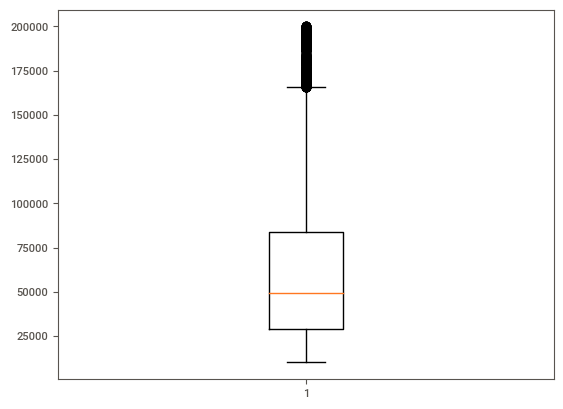

In [15]:
plt.boxplot(dfdata['MonthlyIncome'])
plt.show()

Los valores se encuetran sesgados hacia la izquierda, por tal motivo la media y distribución del salario tiene como media 50,000

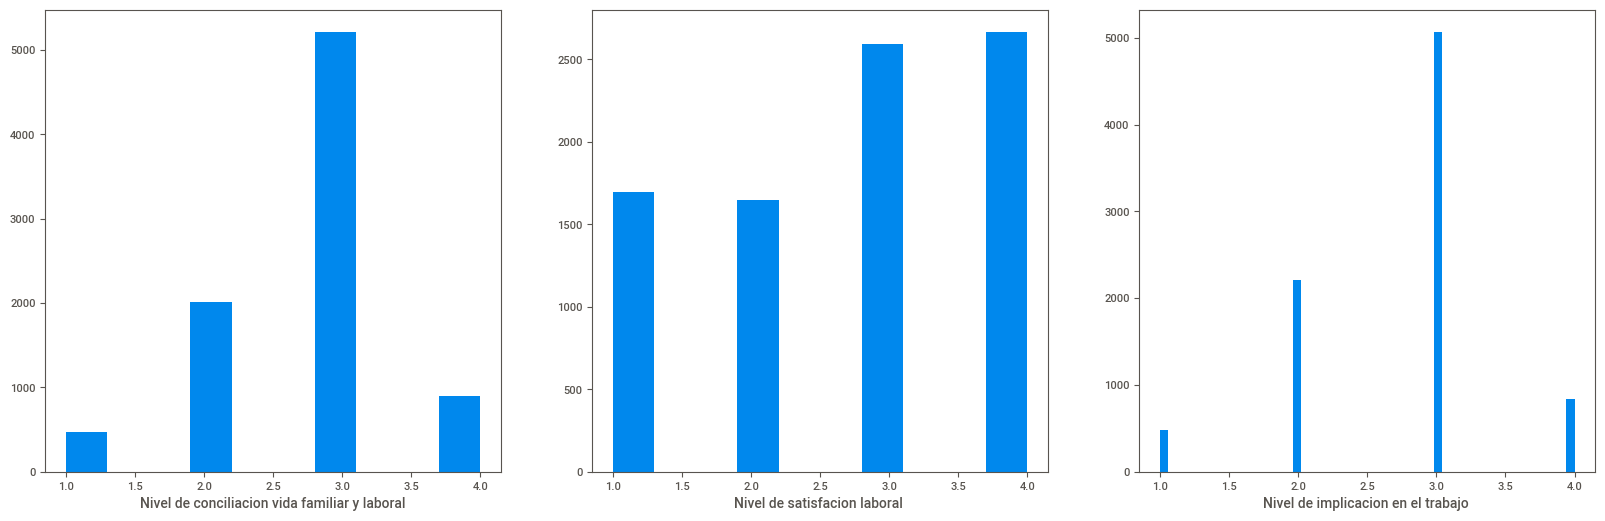

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.hist(dfdata.WorkLifeBalance,10)
plt.xlabel('Nivel de conciliacion vida familiar y laboral')
plt.subplot(1,3,2)
plt.hist(dfdata.JobSatisfaction,10)
plt.xlabel('Nivel de satisfacion laboral ')
plt.subplot(1,3,3)
plt.hist(dfdata.JobInvolvement , 50)
plt.xlabel('Nivel de implicacion en el trabajo ')

plt.show()

Estas variables son variables categoricas donde cada categoria esta representada por numeros de la siguiente manera:
1 Bajo
2 Medio
3 Alto
4 Muy alto


En el nivel de conciliacion de la vida familiar y laboral podemos observar que la categoria donde mas encontramos valores es en la numero 3
Por lo que quizas ese no sea un motivo de renuncia

En el nivel de satisfaccion laboral podemos observar que la distribucion de las categorias se encuentra divida en "dos" ya que tenemos la categoria 1y 2 con similares cantidades
y la 3 y 4 tambien con similares cantiades pero siendo estas dos las mas frecuentes por lo que esta seria una variable interesente a la hora de realizar el modelo


En el nivel de implicacion en el trabajo podemos observar que la categoria donde mas encontramos valores es en la numero 3
Por lo que podriamos pensar que las personas de la organizacion se sienten bien con su trabajo y el valor que tienen en la organizacion

In [17]:
#Relacion de distancia caasa/trabajo por el numero de numero de empleados
datos7=dfdata.groupby(['DistanceFromHome'])[['EmployeeID']].count().reset_index()
datos7.head()

,DistanceFromHome,EmployeeID
0,1,1224
1,2,1228
2,3,486
3,4,370
4,5,372


In [18]:
# Con este grafico observaremos la prevalencia de distancia hacia el trabajo para analizar si es dependiente a la estancia
fig= px.bar(datos7, x='DistanceFromHome', y='EmployeeID', color='DistanceFromHome',   title= '<b>Relación de cantidad de empleados por la distancia casa/trabajo <b>')
fig.update_layout(
    xaxis_title='Distancia casa/trabajo (Kms)',
    yaxis_title='cantidad de empleados',
    legend_title='DistanceFromHome',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [19]:
#Ahora vamos a flitral el df dejando solo variables que aporten al modelo

df_datafinal = dfdata.loc[:,['Age','DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Education','JobLevel', 'StockOptionLevel',  'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition']]

In [20]:
#Aca podemos observar la correlacion de las variables,como podemos observar las variables no se encunetran muy correlacionadas entre ellas  lo que es algo bueno para posteriormente realizar el modelo

df_datafinal.corr()

<ipython-input-20-75586ab3af36>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Education,JobLevel,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.004621,-0.047256,0.303709,-0.034313,0.681213,-0.032032,0.314384,0.216554,0.204117,-0.034452,-0.000781,-0.030608,0.007983,0.000868,-0.024756,0.021284,-0.025059
DistanceFromHome,0.004621,1.000000,-0.019798,-0.016336,0.035857,0.004364,-0.006383,0.030998,0.001888,0.020876,-0.006369,-0.038576,0.007376,0.018882,-0.011494,0.009345,-0.007972,0.035974
MonthlyIncome,-0.047256,-0.019798,1.000000,-0.020110,0.008684,-0.029776,0.044378,0.001878,0.063361,0.025514,0.006381,0.045015,0.034453,-0.005380,0.003420,0.003702,0.028555,0.021096
NumCompaniesWorked,0.303709,-0.016336,-0.020110,1.000000,0.030201,0.240077,-0.030093,-0.115143,-0.033514,-0.107591,-0.018156,-0.008314,0.015965,0.012443,-0.059525,-0.008871,0.026559,0.018649
PercentSalaryHike,-0.034313,0.035857,0.008684,0.030201,1.000000,-0.021199,-0.035020,-0.027679,-0.028367,-0.039807,-0.043592,0.010119,0.012531,-0.003072,0.036671,-0.040252,-0.003603,0.773902
TotalWorkingYears,0.681213,0.004364,-0.029776,0.240077,-0.021199,1.000000,-0.041759,0.633194,0.407077,0.463369,-0.008236,-0.035378,0.000556,-0.003919,-0.013379,-0.000430,0.004724,-0.002544
TrainingTimesLastYear,-0.032032,-0.006383,0.044378,-0.030093,-0.035020,-0.041759,1.000000,-0.010299,0.013697,-0.015719,0.009327,-0.032476,-0.066810,0.018327,-0.023072,-0.016614,-0.013835,-0.020549
YearsAtCompany,0.314384,0.030998,0.001878,-0.115143,-0.027679,0.633194,-0.010299,1.000000,0.619342,0.768700,0.008297,-0.064122,0.008330,0.003214,-0.001414,0.013778,0.010027,-0.008726
YearsSinceLastPromotion,0.216554,0.001888,0.063361,-0.033514,-0.028367,0.407077,0.013697,0.619342,1.000000,0.510081,0.026970,-0.058601,0.019924,0.015635,-0.017723,0.007235,0.027911,-0.018307
YearsWithCurrManager,0.204117,0.020876,0.025514,-0.107591,-0.039807,0.463369,-0.015719,0.768700,0.510081,1.000000,0.007476,-0.053771,0.017246,-0.004572,-0.025942,0.005266,-0.001600,-0.006642


NameError: name 'sns' is not defined